In [1]:
import numpy as np
from sklearn import datasets

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.special import expit
from scipy.linalg import cho_factor, cho_solve, eigvals


from logreg import LogisticRegression
from descent import line_search, gradient_descent

In [2]:
x = np.linspace(0, 6)

In [3]:
def ss(x):
    return np.sum(x ** 2, axis=0)

def ss_grad(x):
    return 2 * x

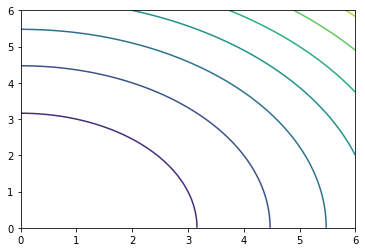

In [4]:
plt.contour(x, x, np.array([[ss(np.array([i, j])) for i in x] for j in x]))

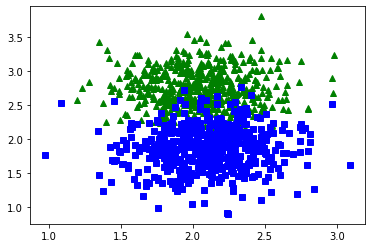

In [5]:
X, y = datasets.make_blobs(n_samples=1000, centers=2, n_features=10, cluster_std=0.3, center_box=(0, 3))
y[y == 0] = -1
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
y = y.reshape(-1, 1)
plt.show()

In [8]:
lr_gd = LogisticRegression(eps=1e-3, compute_alpha=True, method='dichotomy', verbose=50, l2=0.001)
lr_newton = LogisticRegression(eps=1e-3, solver='newton', verbose=1, l2=0.001)

In [10]:
# lr_newton.fit(X, y)

In [11]:
lr_gd.fit(X, y)

Iteration 50, Grad norm: 0.006600, Left: 0.005956
Iteration 100, Grad norm: 0.003634, Left: 0.002990
Iteration 150, Grad norm: 0.002678, Left: 0.002034
Iteration 200, Grad norm: 0.002255, Left: 0.001611
Iteration 250, Grad norm: 0.002021, Left: 0.001377
Iteration 300, Grad norm: 0.001863, Left: 0.001219
Iteration 350, Grad norm: 0.001741, Left: 0.001097
Iteration 400, Grad norm: 0.001638, Left: 0.000993
Iteration 450, Grad norm: 0.001545, Left: 0.000901


KeyboardInterrupt: 

In [9]:
print(f'GD Accuracy = {(lr_gd.predict(X) == y).mean()} \n'
      f'Newton Accuracy = {(lr_newton.predict(X) == y).mean()}')

GD Accuracy = 1.0 
Newton Accuracy = 1.0
